In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [4]:
df= pd.read_csv('Zeel_analytics_data.csv',skiprows=6)

In [5]:
df.head()

,Age,Affinity Category (reach),Gender,Region,Device Category,Sessions,Avg. Session Duration,Pages / Session,All 5 Flow Conversions
0,25-34,Media & Entertainment/Movie Lovers,female,California,desktop,"1,775",0:04:27,6.16,40
1,25-34,Media & Entertainment/Movie Lovers,male,California,desktop,"1,642",0:03:07,5.91,29
2,25-34,Lifestyles & Hobbies/Art & Theater Aficionados,female,California,desktop,"1,599",0:04:44,6.19,40
3,25-34,Shoppers/Value Shoppers,female,California,desktop,"1,569",0:04:23,6.16,40
4,25-34,Travel/Travel Buffs,female,California,desktop,"1,551",0:04:26,6.23,43


In [6]:
df=pd.get_dummies(df)

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
X = df.loc[:, df.columns != 'All 5 Flow Conversions']
y = df['All 5 Flow Conversions']
X = pd.get_dummies(X)

In [9]:
rf = RandomForestRegressor(n_estimators=100)

In [10]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [11]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.round(rf.feature_importances_, 3)
}).sort_values(by='Importance', ascending=False)

In [12]:
importances
#Pages/Session
#Age_25-34
#Region - Cali/New York
#Age 35-44
#Region Texas
#Gender
#Device

,Feature,Importance
0,Pages / Session,0.291
2,Age_25-34,0.084
128,Region_California,0.061
161,Region_New York,0.058
3,Age_35-44,0.026
175,Region_Texas,0.024
119,Gender_male,0.020
118,Gender_female,0.017
184,Device Category_mobile,0.013
1,Age_18-24,0.009


In [24]:
# keep the top 25
vals_to_keep = importances['Feature'][:25].values.tolist()

In [25]:
# standardize data
data_for_cluster = (X[vals_to_keep] - X[vals_to_keep].mean()) / X[vals_to_keep].std()

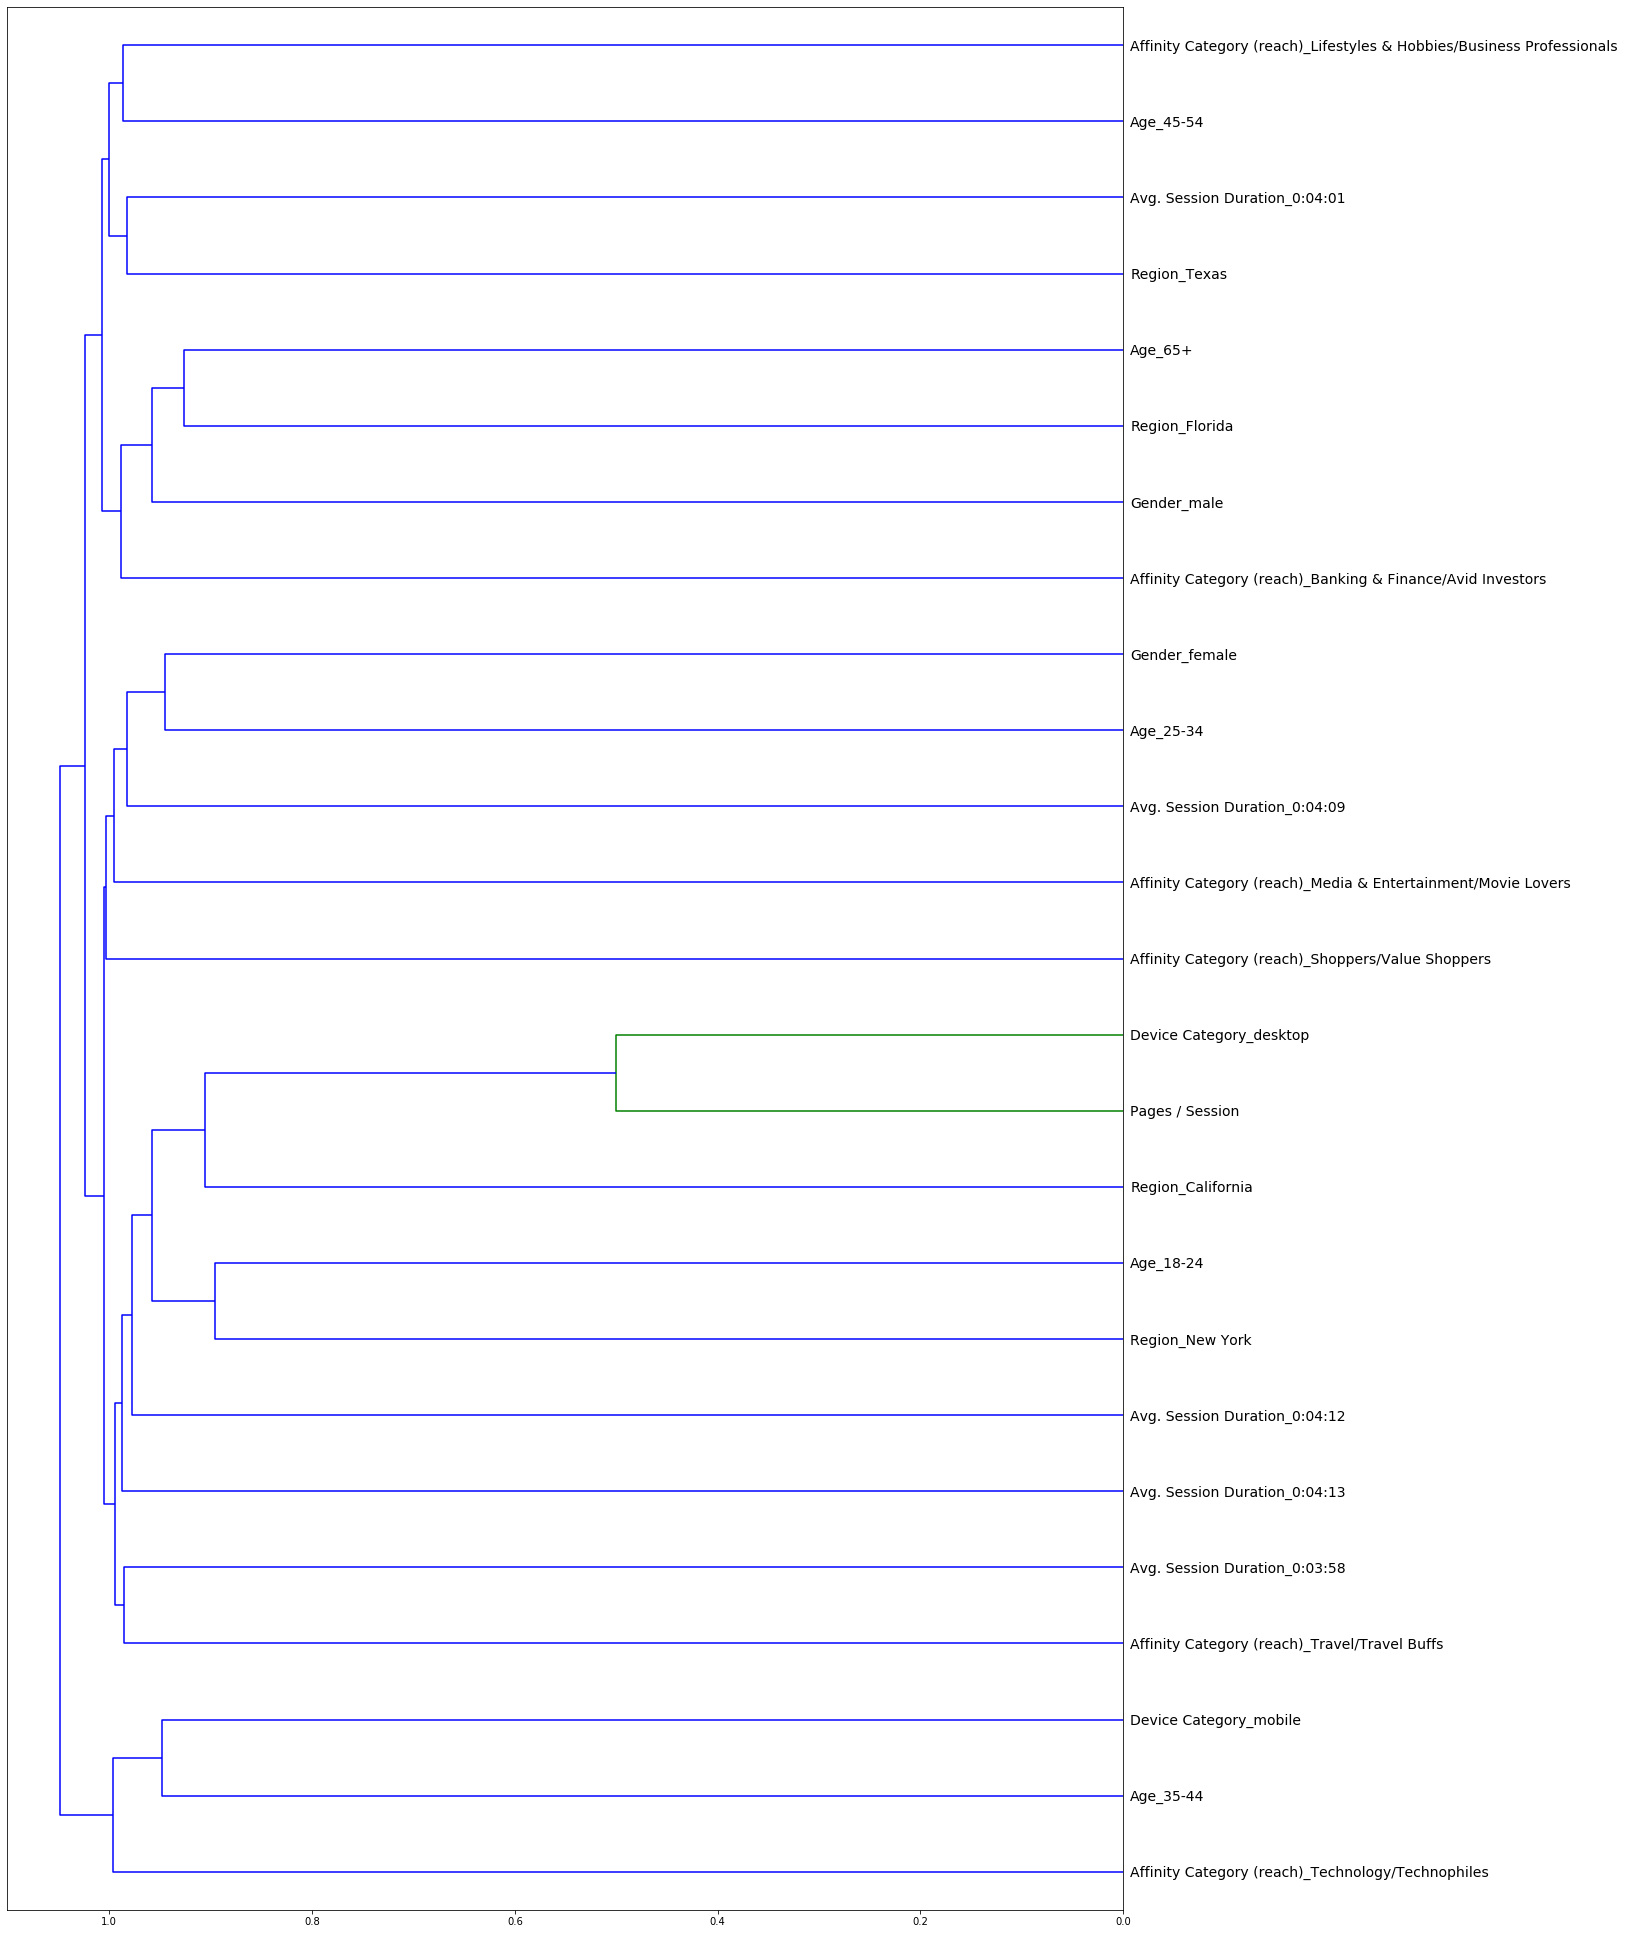

In [26]:
# create the dendrogram
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr as sp
import matplotlib.pyplot as plt
%matplotlib inline

corr = np.round(sp(data_for_cluster).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,35))
dendrogram = hc.dendrogram(z, labels=vals_to_keep, orientation='left', leaf_font_size=14)
plt.show()